From Chapter 8 in Euan Sinclair and Andrew Mack's *Retail Options Trading*


A negative Z-Score indicates backwardation

In [16]:
import matplotlib.pyplot as plt
import yfinance as yf

In [17]:
window = 10

vix_tk = yf.Ticker('^VIX')
vix_df = vix_tk.history(start='2024-2-1',  end='2024-8-1', interval='1d')[['Open','High', 'Low','Close', 'Volume']]

vix3m_tk = yf.Ticker('^VIX3M')
vix3m_df = vix3m_tk.history(start='2024-2-1',  end='2024-8-1', interval='1d')[['Open','High', 'Low','Close', 'Volume']]

vix_df.index = vix_df.index.date
vix3m_df.index = vix3m_df.index.date

vix_df['Daily_diff'] = vix3m_df['Close'] - vix_df['Close']
vix_df['Roll_mean'] = vix_df['Daily_diff'].rolling(window).mean()
vix_df['Roll_std'] = vix_df['Daily_diff'].rolling(window).std()
vix_df['zscore'] = (vix_df['Daily_diff'] - vix_df['Roll_mean'])/vix_df['Roll_std']

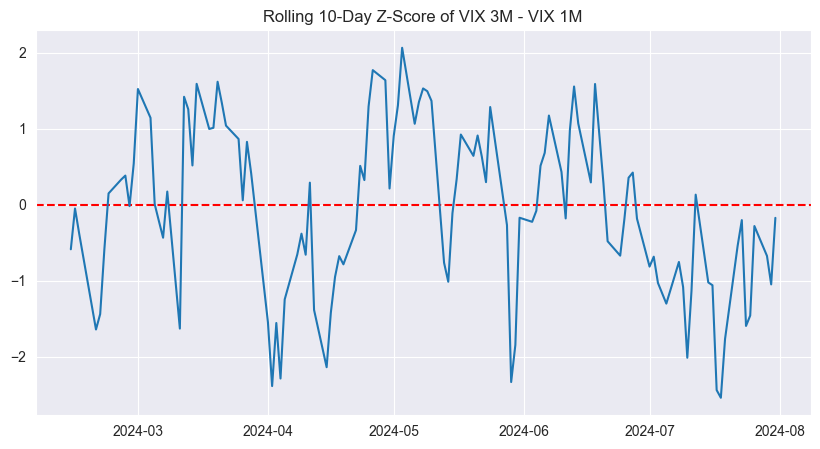

In [18]:
plt.figure(figsize=(10,5))
plt.title('Rolling 10-Day Z-Score of VIX 3M - VIX 1M')
plt.axhline(y=0.0, color='r', linestyle='--')
plt.plot(vix_df['zscore']);